In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import  layers, models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Input ,BatchNormalization,Flatten, Dense,Dropout
import numpy as np

In [33]:
# Define the Mesonet-4 architecture
def mesonet4(input_shape):


    #//////////////////////////////////////////////
      x = Input(shape=input_shape)

      x1=layers.Conv2D(8 ,(3,3),padding='same', activation='relu')(x)
      x1=BatchNormalization()(x1)
      x1=layers.MaxPooling2D((2,2))(x1)

      x2=layers.Conv2D(filters=8 , kernel_size=(5,5),padding='same', activation='relu')(x1)
      x2=BatchNormalization()(x2)
      x2=layers.MaxPooling2D((2,2))(x2)
      x3=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x2)
      x3=BatchNormalization()(x3)
      x3=layers.MaxPooling2D((2,2))(x3)

      x4=layers.Conv2D(filters=16 , kernel_size=(5,5),padding='same', activation='relu')(x3)
      x4=BatchNormalization()(x4)
      x4=layers.MaxPooling2D((4,4))(x4)

      y=Flatten()(x4)
      y=Dropout(0.5)(y)
      y=Dense(16)(y)
      y=LeakyReLU(alpha=0.1)(y)
      y=Dropout(0.5)(y)
      y=Dense(1,activation='sigmoid')(y)
    #//////////////////////////////////////////////////
      model = Model(inputs= x, outputs=y)
      return model

In [34]:
# Create the Mesonet-4 model
input_shape = (256, 256, 3)  # Modify input shape based on your data
model = mesonet4(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_20 (Conv2D)          (None, 256, 256, 8)       224       
                                                                 
 batch_normalization_20 (Ba  (None, 256, 256, 8)       32        
 tchNormalization)                                               
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 128, 128, 8)       0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 128, 128, 8)       1608      
                                                                 
 batch_normalization_21 (Ba  (None, 128, 128, 8)       32  

In [35]:
# from google.colab import drive
# drive.mount('/content/drive')
import os

In [38]:
os.chdir("/home/dev/SIC_AI/Deep-fake-detection/Dataset/df_database/")
os.getcwd()

'/home/dev/SIC_AI/Deep-fake-detection/Dataset/df_database'

In [39]:
os.listdir('./train:test/')

['real', 'df']

In [40]:
# Data loading and preprocessing
# You should replace this with your dataset loading and preprocessing code
# Make sure to split your dataset into training and validation sets

# Example data loading using ImageDataGenerator
train_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

train_generator = train_data_generator.flow_from_directory(
    './train:test/',
    target_size=(256, 256),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    subset='training'  # Use 'validation' for validation generator
)

Found 12353 images belonging to 2 classes.


In [41]:
train_generator.class_indices

{'df': 0, 'real': 1}

In [42]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [75]:
# Training the model
model.fit(train_generator, epochs=25)
os.chdir('/home/dev/SIC_AI/Deep-fake-detection/Model/')
model.save('my_trained_model_new1.h5')

Epoch 1/25
387/387 [==============================] - 474s 1s/step - loss: 0.6926 - accuracy: 0.5928
Epoch 2/25
387/387 [==============================] - 427s 1s/step - loss: 0.5741 - accuracy: 0.7020
Epoch 3/25
387/387 [==============================] - 414s 1s/step - loss: 0.4807 - accuracy: 0.7639
Epoch 4/25
387/387 [==============================] - 569s 1s/step - loss: 0.4316 - accuracy: 0.7953
Epoch 5/25
387/387 [==============================] - 587s 2s/step - loss: 0.3874 - accuracy: 0.8213
Epoch 6/25
387/387 [==============================] - 568s 1s/step - loss: 0.3660 - accuracy: 0.8289
Epoch 7/25
387/387 [==============================] - 439s 1s/step - loss: 0.3482 - accuracy: 0.8431
Epoch 8/25
387/387 [==============================] - 486s 1s/step - loss: 0.3315 - accuracy: 0.8527
Epoch 9/25
387/387 [==============================] - 487s 1s/step - loss: 0.3262 - accuracy: 0.8580
Epoch 10/25
387/387 [==============================] - 489s 1s/step - loss: 0.2967 - accura

/home/dev/SIC_AI/MYENV/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
os.chdir('/home/dev/SIC_AI/Deep-fake-detection/Model/')
loaded_model = load_model('my_trained_model_new1.h5')
#MODEL LOADED
load_model

<function keras.src.saving.saving_api.load_model(filepath, custom_objects=None, compile=True, safe_mode=True, **kwargs)>

In [49]:
os.chdir('/home/dev/SIC_AI/Deep-fake-detection/Dataset/df_database/')
# Test Generator
test_data_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)

test_generator = test_data_generator.flow_from_directory(
    './validation/',
    target_size=(256, 256),
    batch_size=32,
    color_mode='rgb',
    class_mode='binary',
    #shuffle=False
)


Found 7104 images belonging to 2 classes.


In [ ]:
results = loaded_model.evaluate(test_generator)
tf.print('Accuracy: ', results[1]*100)

 14/222 [>.............................] - ETA: 2:58 - loss: 0.4166 - accuracy: 0.8460

In [85]:
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# import matplotlib.pyplot as plt

# def preprocess_image(image_path):
#     img = load_img(image_path, target_size=(128, 128,3))  # You can adjust the target size to match your model's input size
#     img = img_to_array(img)
#     img = np.expand_dims(img, axis=0)
#     img = img / 255.0  # Normalize the image data if your model requires it
#     return img

In [86]:
# def predict_and_display(image_path):
#     img = preprocess_image(image_path)
#     prediction = model.predict(img)
#     class_label = "Real" if prediction < 0.5 else "Deepfake"
#     confidence = abs(0.5 - prediction[0, 0]) * 2  # Scale the confidence between 0 and 1

#     # Display the image and prediction
#     plt.imshow(cv2.imread(image_path))
#     plt.title(f"Class: {class_label}, Confidence: {confidence:.2f}")
#     plt.show()

In [87]:
# import os
# import cv2

# validation_data_dir = '/content/drive/MyDrive/Colab_Notebooks/deepfake_database/validation'

# for subdir in os.listdir(validation_data_dir):
#     subdir_path = os.path.join(validation_data_dir, subdir)
#     if os.path.isdir(subdir_path):
#         for file in os.listdir(subdir_path):
#             image_path = os.path.join(subdir_path, file)
#             img = preprocess_image(image_path)
#             prediction = model.predict(img)
#             predicted_class = 1 if prediction >= 0.5 else 0  # 1 for "deepfake" and 0 for "real"

#             actual_class = 1 if subdir == 'deepfake' else 0  # Define the actual class based on the folder name

#             if predicted_class != actual_class:
#                 # Display the image with both predicted and actual labels
#                 predicted_label = "Deepfake" if predicted_class == 1 else "Real"
#                 actual_label = "Deepfake" if actual_class == 1 else "Real"
#                 confidence = abs(0.5 - prediction[0, 0]) * 2

#                 # Display the image and labels
#                 image = cv2.imread(image_path)
#                 fig, ax = plt.subplots(1, 2, figsize=(10, 4))
#                 ax[0].imshow(image)
#                 ax[0].set_title(f"Predicted: {predicted_label}")
#                 ax[1].imshow(image)
#                 ax[1].set_title(f"Actual: {actual_label}")
#                 plt.show()

evaluating models performance

In [88]:
true_labels = []
predicted_labels = []

New Approach

In [24]:
test_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [75]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have loaded the test data and true labels correctly

# Make predictions on the test dataset using your loaded model
test_predictions = loaded_model.predict(test_generator)

339/339 [==============================] - 187s 551ms/step


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ensure that the true_labels have the same number of samples as test_predictions
true_labels = test_generator.classes

binary_predictions = (test_predictions >= 0.71).astype(int)

# Ensure that the true_labels are already in a binary format
# If not, convert them to binary format as well

# Calculate evaluation metrics
accuracy = accuracy_score(true_labels, binary_predictions)
precision = precision_score(true_labels, binary_predictions)
recall = recall_score(true_labels, binary_predictions)
f1 = f1_score(true_labels, binary_predictions)
confusion = confusion_matrix(true_labels, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8362894144144144
Precision: 0.8989690721649485
Recall: 0.8189715895750176
F1-Score: 0.8571077527951838
Confusion Matrix:
[[2453  392]
 [ 771 3488]]


In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

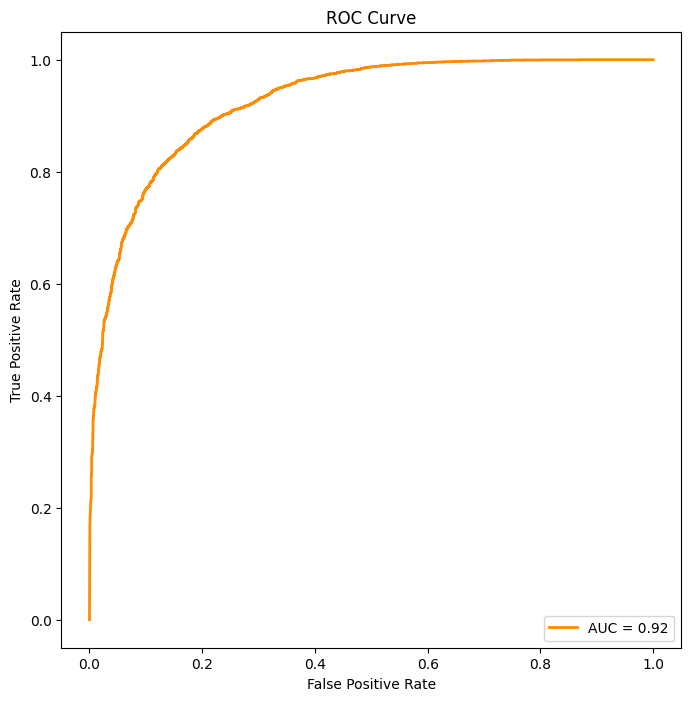

In [30]:
fpr, tpr, thresholds = roc_curve(test_generator.labels,test_predictions)
roc_auc=auc(fpr,tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

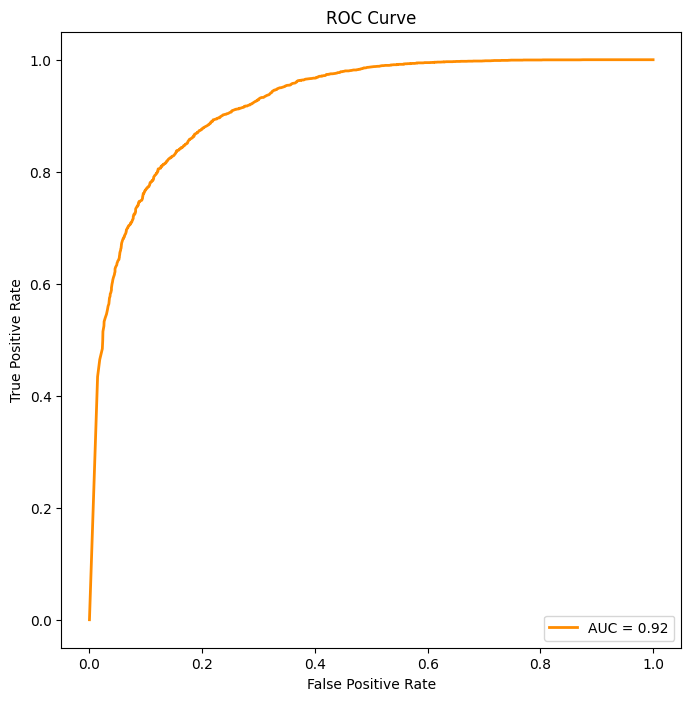

In [31]:
cutoff_grid=np.linspace(0.0,1.0,1000)
TPR=[]
FPR=[]
# Populate the TP and FP lists.
for cutoff in cutoff_grid:
    Y_pred_test_val = (test_predictions > cutoff).astype(int)
    conf_mat = confusion_matrix(test_generator.labels,Y_pred_test_val)
    sensitivity = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    specificity = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    TPR.append(sensitivity)
    FPR.append(1-specificity)
# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(FPR, TPR, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

1/1 [==============================] - 0s 31ms/step


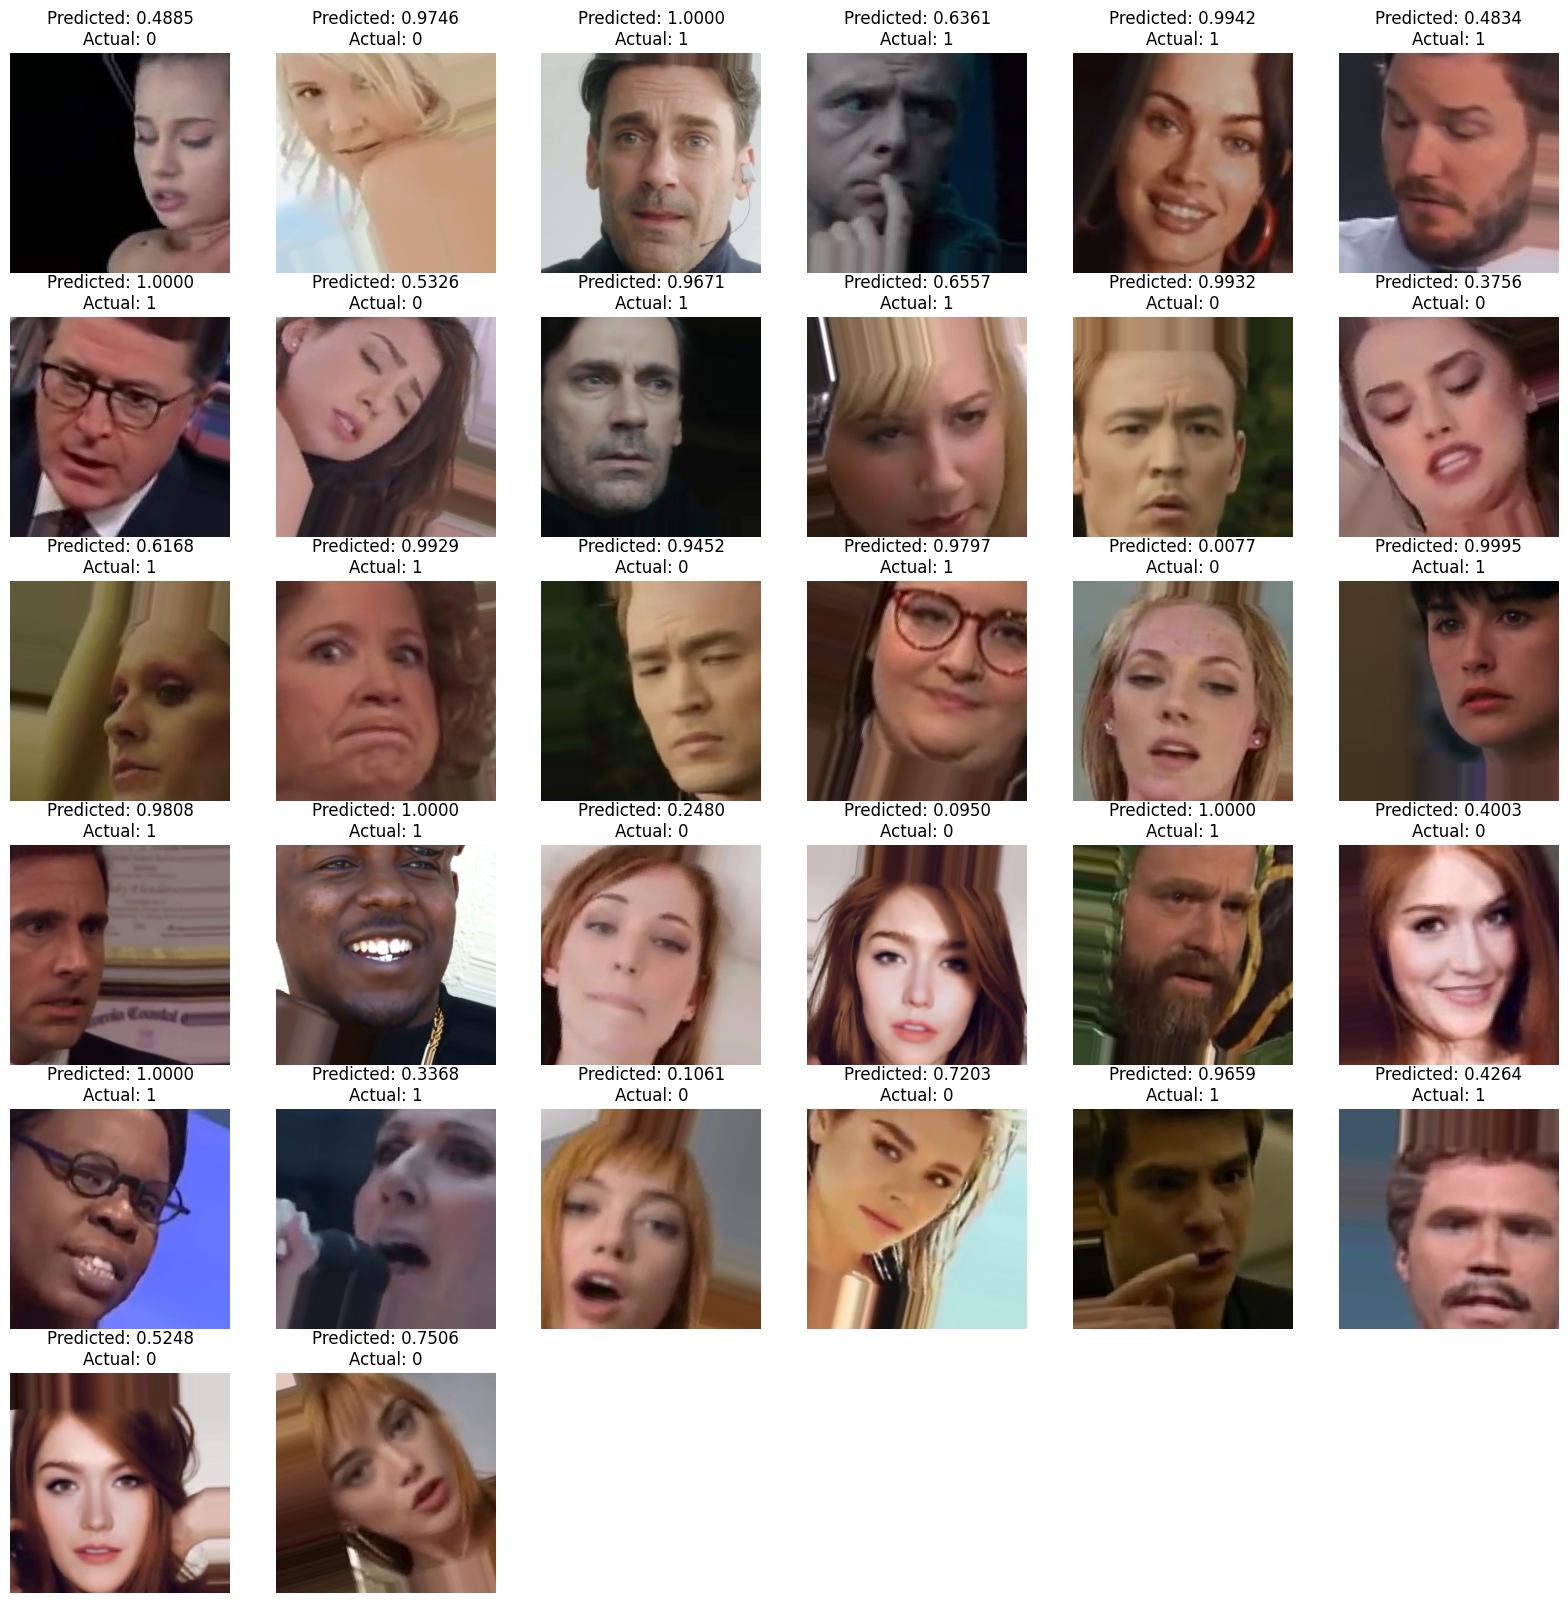

In [17]:
import math
X,y=test_generator.next()#random.choice(test_generator)
batch_size = X.shape[0]

# Calculate the number of rows and columns for the grid
rows = int(math.ceil(math.sqrt(batch_size)))
columns = int(math.ceil(batch_size / rows))

# Create a grid of subplots
fig, axes = plt.subplots(rows, columns, figsize=(20, 20))

# Iterate through the batch of images
for i in range(batch_size):
    # Get an individual image and label from the batch
    single_image = X[i]
    single_label = int(y[i])

    # Make a prediction for the individual image
    predicted_likelihood = loaded_model.predict(single_image.reshape(1, 256, 256, 3))[0][0]

    # Calculate the subplot position
    row = i // columns
    col = i % columns

    # Plot the image and add labels
    ax = axes[row, col]
    ax.imshow(np.squeeze(single_image))
    ax.set_title(f"Predicted: {predicted_likelihood:.4f}\nActual: {single_label}")
    ax.axis('off')

# Remove empty subplots, if any
for i in range(batch_size, rows * columns):
    fig.delaxes(axes.flatten()[i])
plt.show()